In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# CSV dosyasının konumunu buraya yaz
csv_path = "decode_results.csv"  # CSV dosyanın bulunduğu konumu yaz
df = pd.read_csv(csv_path)

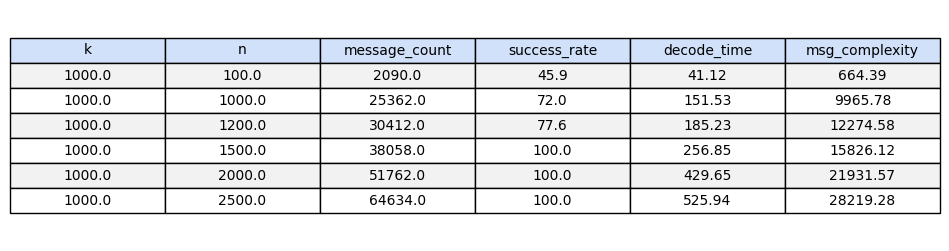

In [4]:
# Renklendirilmiş tablo çizimi
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')

# Tabloyu oluştur
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#d0e1f9'] * len(df.columns))  # Başlık satırına renk

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Satırları renklendir
for i in range(len(df)):
    color = '#f2f2f2' if i % 2 == 0 else '#ffffff'  # Alternatif satır renklendirme
    for j in range(len(df.columns)):
        table[(i + 1, j)].set_facecolor(color)

plt.show()


n Değerine Göre Decode Süresi Grafiği

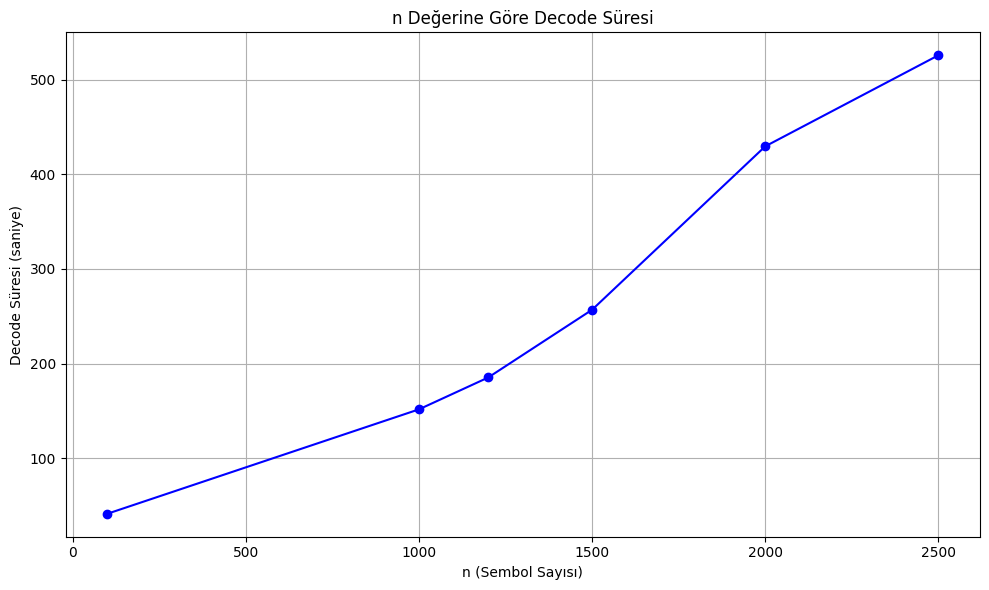

In [5]:
# n değerine göre sırala
df = df.sort_values(by="n")

# Grafik oluştur
plt.figure(figsize=(10, 6))
plt.plot(df["n"], df["decode_time"], marker='o', linestyle='-', color='blue')
plt.title("n Değerine Göre Decode Süresi")
plt.xlabel("n (Sembol Sayısı)")
plt.ylabel("Decode Süresi (saniye)")
plt.grid(True)
plt.tight_layout()
plt.show()

n Değerine Göre Başarı Oranı

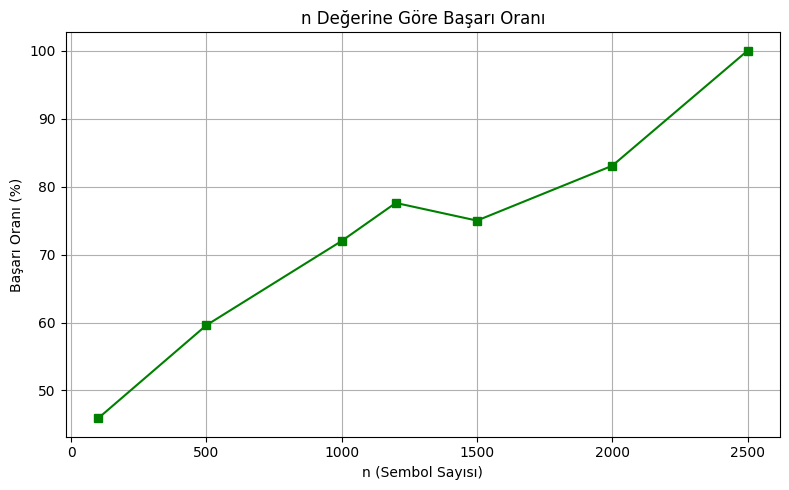

In [9]:
# CSV dosyasının konumunu buraya yaz
csv_path = "decode_basari.csv"  # CSV dosyanın bulunduğu konumu yaz
df = pd.read_csv(csv_path)
# Grafik: n vs success_rate
plt.figure(figsize=(8, 5))
plt.plot(df["n"], df["success_rate"], marker='s', color='green')
plt.title("n Değerine Göre Başarı Oranı")
plt.ylabel("Başarı Oranı (%)")
plt.xlabel("n (Sembol Sayısı)")
plt.grid(True)
plt.tight_layout()
plt.show()


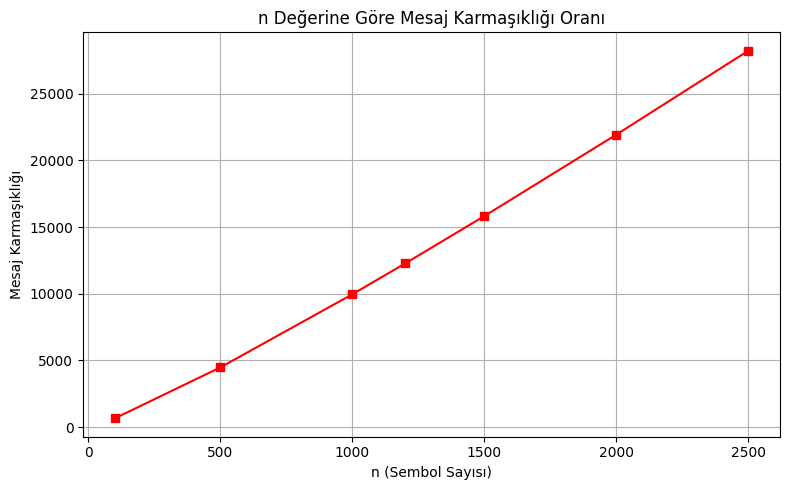

In [11]:
# CSV dosyasının konumunu buraya yaz
csv_path = "decode_basari.csv"  # CSV dosyanın bulunduğu konumu yaz
df = pd.read_csv(csv_path)
# Grafik: n vs success_rate
plt.figure(figsize=(8, 5))
plt.plot(df["n"], df["msg_complexity"], marker='s', color='red')
plt.title("n Değerine Göre Mesaj Karmaşıklığı Oranı")
plt.ylabel("Mesaj Karmaşıklığı")
plt.xlabel("n (Sembol Sayısı)")
plt.grid(True)
plt.tight_layout()
plt.show()

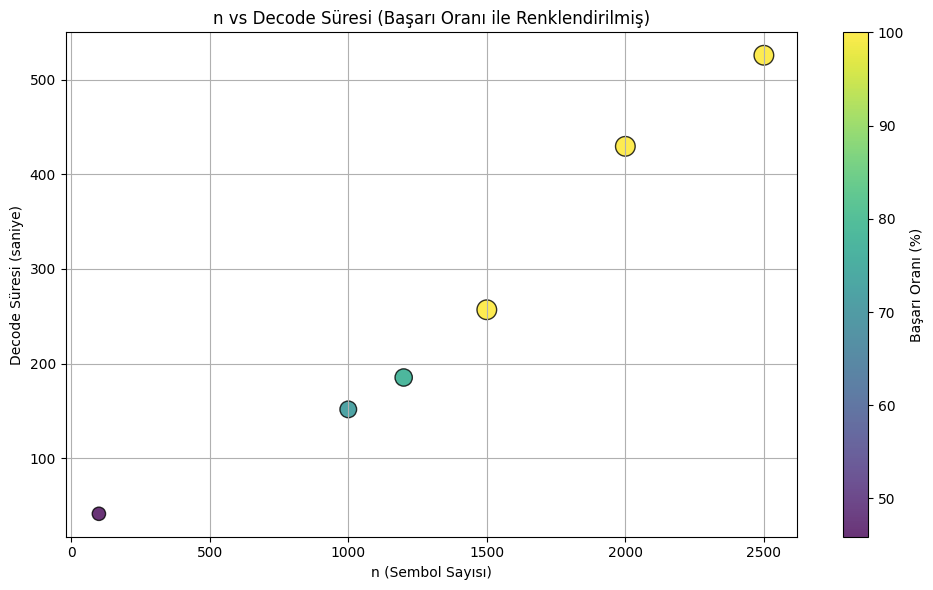

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
csv_path = "decode_results.csv"  # Kendi dosya yolunu yaz
df = pd.read_csv(csv_path)

# Baloncuk Grafiği
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["n"],
    df["decode_time"],
    s=df["success_rate"] * 2,        # Başarı oranına göre baloncuk boyutu
    c=df["success_rate"],            # Başarı oranına göre renk
    cmap="viridis",                  # Renk paleti
    alpha=0.8,
    edgecolors="black"
)

# Başlık ve etiketler
plt.title("n vs Decode Süresi (Başarı Oranı ile Renklendirilmiş)")
plt.xlabel("n (Sembol Sayısı)")
plt.ylabel("Decode Süresi (saniye)")
plt.grid(True)

# Renk skalası
cbar = plt.colorbar(scatter)
cbar.set_label("Başarı Oranı (%)")

plt.tight_layout()
plt.show()


n vs efficiency_ratio (Gerçek / Teorik Mesaj Karmaşıklığı)

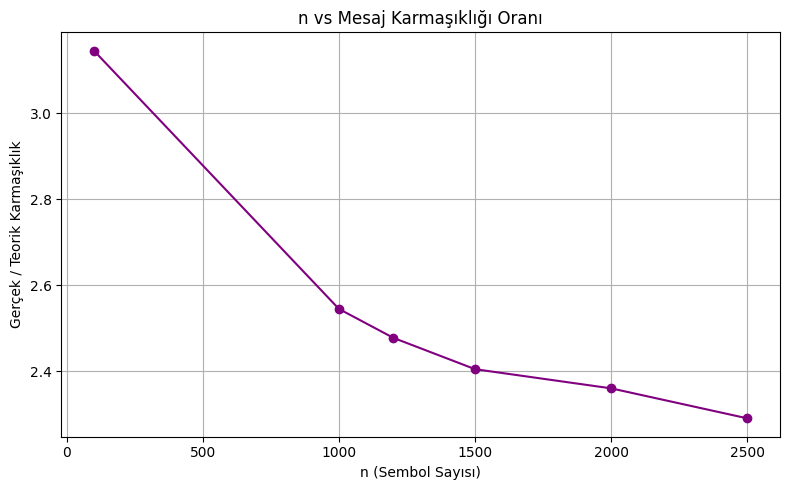

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
csv_path = "decode_results.csv"  # Dosya yolunu burada belirt
df = pd.read_csv(csv_path)

# Verimlilik oranını hesapla (gerçek mesaj sayısı / teorik karmaşıklık)
df["efficiency_ratio"] = df["message_count"] / df["msg_complexity"]

# Grafik oluştur
plt.figure(figsize=(8, 5))
plt.plot(df["n"], df["efficiency_ratio"], marker='o', color='purple')
plt.title("n vs Mesaj Karmaşıklığı Oranı")
plt.xlabel("n (Sembol Sayısı)")
plt.ylabel("Gerçek / Teorik Karmaşıklık")
plt.grid(True)
plt.tight_layout()
plt.show()


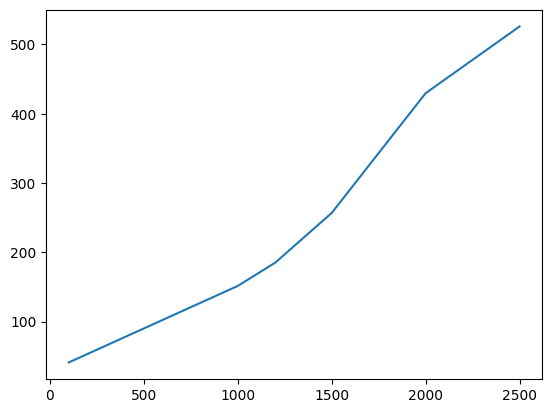

In [7]:
plt.plot(df["n"], df["decode_time"])  # Zaten bu hazır


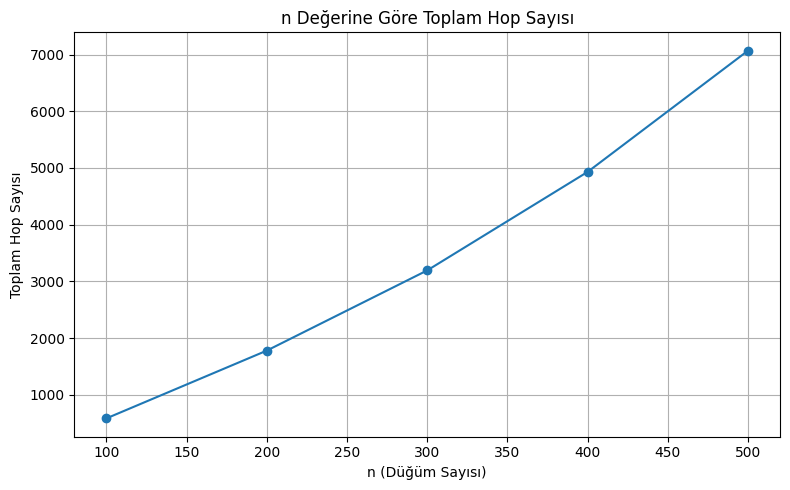

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Manuel veri seti
data = {
    'n': [100, 200, 300, 400, 500],
    'total_hops': [584, 1779, 3193, 4930, 7068]
}

df = pd.DataFrame(data)

# Grafik çizimi
plt.figure(figsize=(8, 5))
plt.plot(df['n'], df['total_hops'], marker='o')
plt.title('n Değerine Göre Toplam Hop Sayısı')
plt.xlabel('n (Düğüm Sayısı)')
plt.ylabel('Toplam Hop Sayısı')
plt.grid(True)
plt.tight_layout()
plt.show()


Bubble Chart (Baloncuk Grafiği)

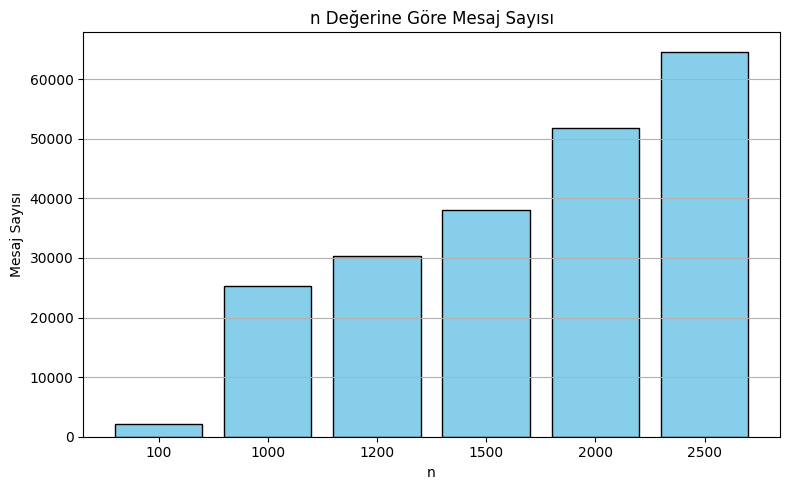

In [14]:
plt.figure(figsize=(8, 5))
plt.bar(df["n"].astype(str), df["message_count"], color='skyblue', edgecolor='black')
plt.title("n Değerine Göre Mesaj Sayısı")
plt.xlabel("n")
plt.ylabel("Mesaj Sayısı")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Stacked Area Chart (Toplam katkıyı gösterir)

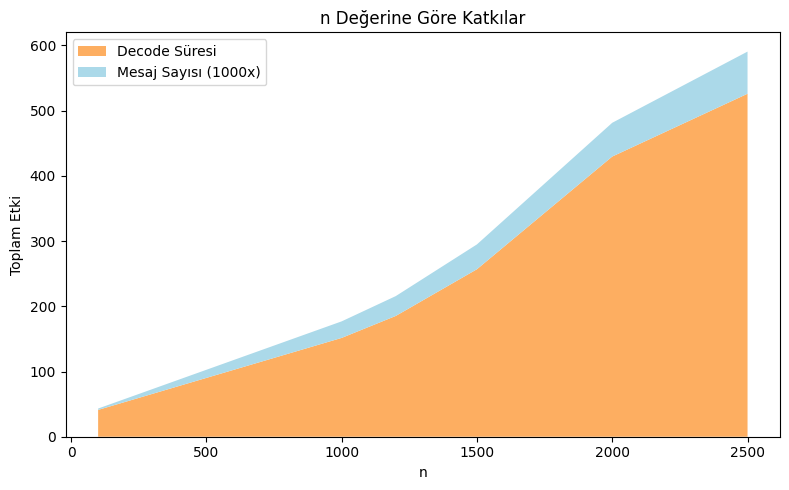

In [15]:
plt.figure(figsize=(8, 5))
plt.stackplot(
    df["n"],
    df["decode_time"],
    df["message_count"] / 1000,  # ölçekleme yapılabilir
    labels=["Decode Süresi", "Mesaj Sayısı (1000x)"],
    colors=["#fdae61", "#abd9e9"]
)
plt.title("n Değerine Göre Katkılar")
plt.xlabel("n")
plt.ylabel("Toplam Etki")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


Line + Marker kombinasyonu (Farklı stiller)

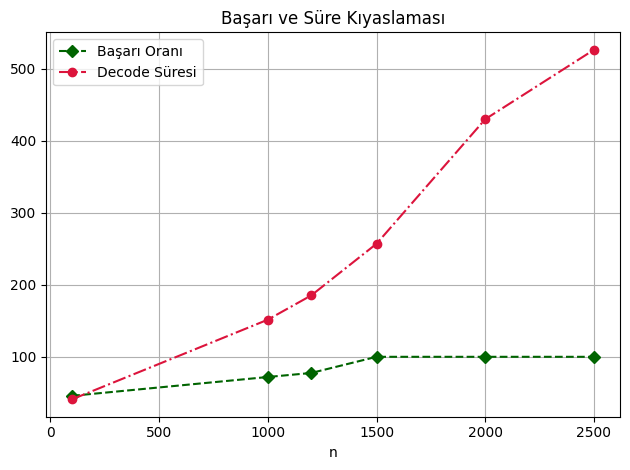

In [16]:
plt.plot(df["n"], df["success_rate"], linestyle='--', marker='D', color='darkgreen', label='Başarı Oranı')
plt.plot(df["n"], df["decode_time"], linestyle='-.', marker='o', color='crimson', label='Decode Süresi')
plt.title("Başarı ve Süre Kıyaslaması")
plt.xlabel("n")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


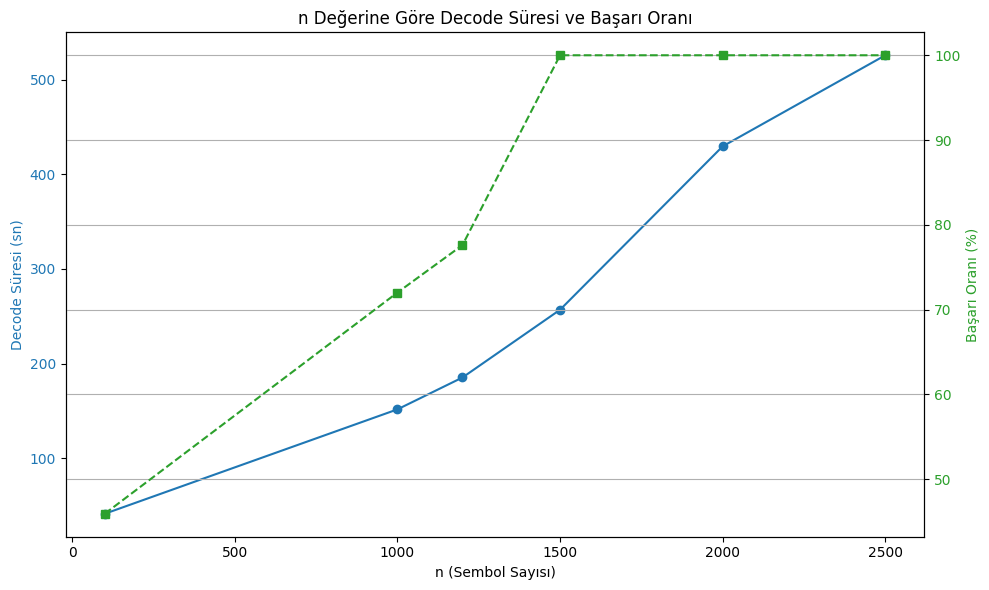

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV'den veriyi oku
df = pd.read_csv("decode_results.csv")

# Grafik oluştur (çift eksen)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Decode süresi - sol eksen
color = 'tab:blue'
ax1.set_xlabel("n (Sembol Sayısı)")
ax1.set_ylabel("Decode Süresi (sn)", color=color)
ax1.plot(df["n"], df["decode_time"], marker='o', color=color, label="Decode Süresi")
ax1.tick_params(axis='y', labelcolor=color)

# Başarı oranı - sağ eksen
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel("Başarı Oranı (%)", color=color)
ax2.plot(df["n"], df["success_rate"], marker='s', linestyle='--', color=color, label="Başarı Oranı")
ax2.tick_params(axis='y', labelcolor=color)

# Başlık ve gösterim
plt.title("n Değerine Göre Decode Süresi ve Başarı Oranı")
fig.tight_layout()
plt.grid(True)
plt.show()


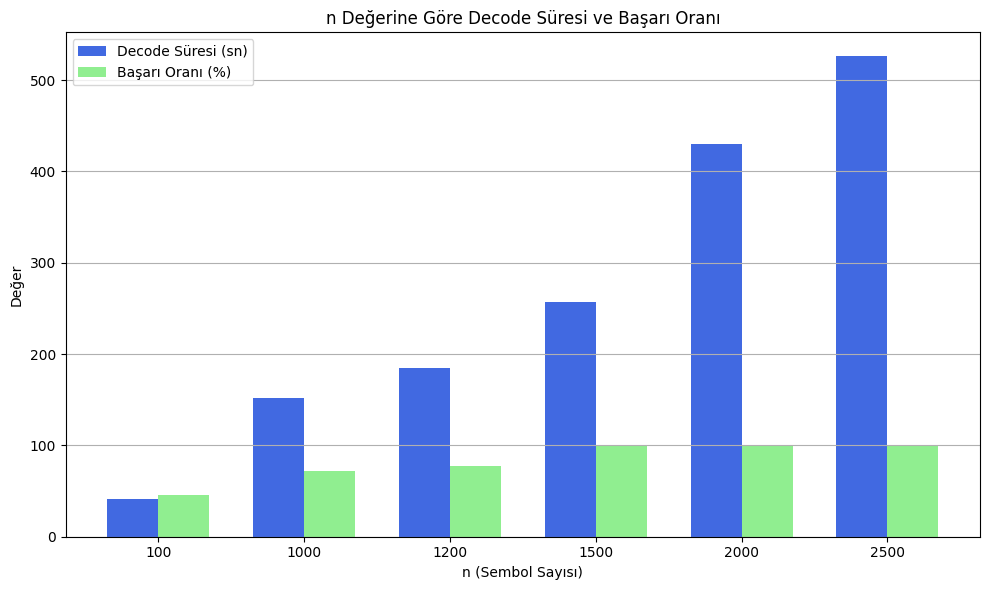

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Veriyi oku
df = pd.read_csv("decode_results.csv")

# Benzersiz n değerleri
n_values = df["n"].astype(str)
x = np.arange(len(n_values))  # x ekseni için pozisyonlar

# Değerler
decode_times = df["decode_time"]
success_rates = df["success_rate"]

# Grafik oluştur
width = 0.35  # çubuk genişliği
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, decode_times, width, label='Decode Süresi (sn)', color='royalblue')
plt.bar(x + width/2, success_rates, width, label='Başarı Oranı (%)', color='lightgreen')

# Etiketler
plt.xlabel("n (Sembol Sayısı)")
plt.ylabel("Değer")
plt.title("n Değerine Göre Decode Süresi ve Başarı Oranı")
plt.xticks(x, n_values)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
